C:\Users\Shimizu\AppData\Local\Temp\ipykernel_1964\2150621923.py:19: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(input_path)


Ảnh đã được lưu tại: output\kiwi_wave.jpg


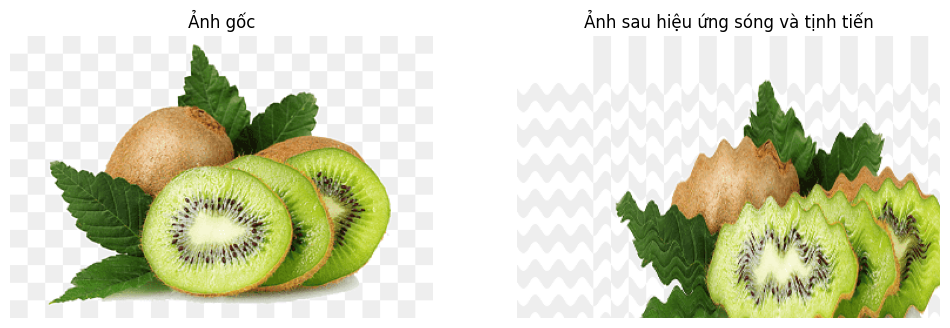

In [1]:
'''
Bài 1: 
Chọn ảnh quả kiwi bất kì .
Tịnh tiến quả kiwi 50 pixel sang phải và 30 pixel xuống dưới.
Áp dụng hiệu ứng sóng (wave effect) lên quả kiwi bằng cách sử dụng biến đổi tọa độ (map_coordinates) với hàm sin.
Lưu ảnh kết quả vào file kiwi_wave.jpg
'''

import numpy as np
import imageio
from scipy.ndimage import map_coordinates
import matplotlib.pyplot as plt
import os

# Đường dẫn ảnh đầu vào
input_path = './img/kiwi.png'

# Đọc ảnh quả kiwi
img = imageio.imread(input_path)

# Lấy kích thước ảnh và số kênh màu
if img.ndim == 3:
    h, w, c = img.shape
else:
    h, w = img.shape
    c = 1

# Tịnh tiến ảnh 50 pixel sang phải, 30 pixel xuống dưới
tx, ty = 50, 30

# Tạo lưới tọa độ cho ảnh đích
x, y = np.meshgrid(np.arange(w), np.arange(h))

# Tọa độ ảnh gốc tương ứng với ảnh dịch chuyển
x_src = x - tx
y_src = y - ty

# Áp dụng hiệu ứng sóng: biến đổi tọa độ y theo sin của x
A = 5       # Biên độ sóng
f = 0.05    # Tần số sóng
y_wave = y_src + A * np.sin(2 * np.pi * f * x_src)

# Giữ nguyên x_src
x_wave = x_src

# Giới hạn tọa độ trong phạm vi ảnh gốc để tránh lỗi
x_wave = np.clip(x_wave, 0, w - 1)
y_wave = np.clip(y_wave, 0, h - 1)

# Chuẩn bị ảnh kết quả
if c == 1:
    # Ảnh xám
    coords = np.vstack((y_wave.ravel(), x_wave.ravel()))
    img_waved = map_coordinates(img, coords, order=1, mode='reflect').reshape(h, w)
else:
    # Ảnh màu
    img_waved = np.zeros_like(img)
    for i in range(c):
        coords = np.vstack((y_wave.ravel(), x_wave.ravel()))
        img_waved[..., i] = map_coordinates(img[..., i], coords, order=1, mode='reflect').reshape(h, w)

# Tạo thư mục output nếu chưa tồn tại
output_dir = 'output'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Lưu ảnh kết quả vào thư mục output
output_path = os.path.join(output_dir, 'kiwi_wave.jpg')
imageio.imwrite(output_path, img_waved.astype(np.uint8))

print(f"Ảnh đã được lưu tại: {output_path}")

# Hiển thị ảnh gốc và ảnh sau biến đổi
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Ảnh gốc')
plt.imshow(img)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Ảnh sau hiệu ứng sóng và tịnh tiến')
plt.imshow(img_waved)
plt.axis('off')

plt.show()

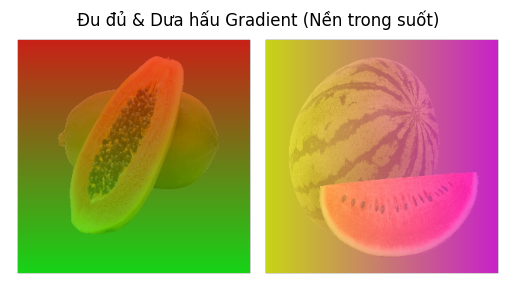

✅ Đã lưu ảnh tại: output\du_du_dua_hau_gradient.png


In [2]:
'''
Bài 2: 
Chọn quả đu đủ và dưa hấu từ google.
Đổi màu đu đủ thành gradient từ đỏ sang xanh lá, và dưa hấu thành gradient từ vàng sang tím.
Ghép hai quả lên một nền trong suốt (alpha channel) và lưu dưới dạng PNG.
'''

import cv2
import numpy as np
import matplotlib.pyplot as plt
import os


du_du_path = "./img/papaya.png"
dua_hau_path = "./img/watermelon.png"

# Kiểm tra tồn tại file
if not os.path.exists(du_du_path):
    print(f"❌ Không tìm thấy ảnh đu đủ tại: {du_du_path}")
    exit()

if not os.path.exists(dua_hau_path):
    print(f"❌ Không tìm thấy ảnh dưa hấu tại: {dua_hau_path}")
    exit()

# Đọc ảnh
img_papaya = cv2.imread(du_du_path)
img_watermelon = cv2.imread(dua_hau_path)

# Resize ảnh nếu cần (ở đây resize về 300x300)
img_papaya = cv2.resize(img_papaya, (300, 300))
img_watermelon = cv2.resize(img_watermelon, (300, 300))

# Tạo gradient đỏ → xanh lá cho đu đủ (dọc)
grad_papaya = np.zeros_like(img_papaya)
for y in range(300):
    r = 255 - int(255 * y / 299)  # đỏ giảm dần
    g = int(255 * y / 299)        # xanh lá tăng dần
    grad_papaya[y, :] = [0, g, r]  # BGR

# Áp dụng blend gradient với ảnh đu đủ (tỷ lệ 0.7 gradient, 0.3 ảnh gốc)
colored_papaya = cv2.addWeighted(img_papaya, 0.3, grad_papaya, 0.7, 0)

# Tạo gradient vàng → tím cho dưa hấu (ngang)
grad_watermelon = np.zeros_like(img_watermelon)
for x in range(300):
    b = int(255 * x / 299)        # xanh dương tăng dần
    g = 255 - int(255 * x / 299)  # xanh lá giảm dần
    grad_watermelon[:, x] = [b, g, 255]  # BGR (vàng là (0,255,255), tím là (128,0,128) nhưng ở đây dùng gần đúng)

# Áp dụng blend gradient với ảnh dưa hấu
colored_watermelon = cv2.addWeighted(img_watermelon, 0.3, grad_watermelon, 0.7, 0)

# Tạo nền trong suốt (canvas) với 4 kênh (BGRA)
canvas = np.zeros((320, 640, 4), dtype=np.uint8)

# Ghép đu đủ bên trái
canvas[10:310, 10:310, :3] = colored_papaya
canvas[10:310, 10:310, 3] = 255  # Alpha đầy đủ

# Ghép dưa hấu bên phải
canvas[10:310, 330:630, :3] = colored_watermelon
canvas[10:310, 330:630, 3] = 255  # Alpha đầy đủ

# Hiển thị ảnh kết quả với matplotlib (chuyển BGRA sang RGBA)
plt.imshow(cv2.cvtColor(canvas, cv2.COLOR_BGRA2RGBA))
plt.title("Đu đủ & Dưa hấu Gradient (Nền trong suốt)")
plt.axis("off")
plt.show()

# Tạo thư mục lưu nếu chưa có
output_dir = "output"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Lưu file PNG có nền trong suốt
save_path = os.path.join(output_dir, "du_du_dua_hau_gradient.png")
cv2.imwrite(save_path, canvas)
print(f"✅ Đã lưu ảnh tại: {save_path}")

In [3]:
'''
Bài 3: 
Chọn ảnh núi và thuyền .
Xoay cả hai đối tượng 45 độ, giữ kích thước ban đầu (reshape=False).
Tạo hiệu ứng phản chiếu dọc (vertical mirror) cho cả hai đối tượng sau khi xoay.
Ghép cả hai đối tượng lên một canvas trắng và lưu vào mountain_boat_mirror.jpg
'''

import cv2
import numpy as np
import os


mountain_path = "./img/mountain.jpg"
boat_path = "./img/boat.jpg"

# Kiểm tra tồn tại file
if not os.path.exists(mountain_path):
    print(f"❌ Không tìm thấy ảnh núi tại: {mountain_path}")
    exit()

if not os.path.exists(boat_path):
    print(f"❌ Không tìm thấy ảnh thuyền tại: {boat_path}")
    exit()

# Đọc ảnh
img_mountain = cv2.imread(mountain_path)
img_boat = cv2.imread(boat_path)

# Resize cả 2 ảnh về cùng kích thước (ví dụ 400x300)
target_size = (400, 300)  # (width, height)
img_mountain = cv2.resize(img_mountain, target_size)
img_boat = cv2.resize(img_boat, target_size)

# Hàm xoay ảnh 45 độ quanh tâm, giữ kích thước (reshape=False)
def rotate_image(image, angle=45):
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_LINEAR, borderMode=cv2.BORDER_REPLICATE)
    return rotated

# Xoay ảnh núi và thuyền
rotated_mountain = rotate_image(img_mountain, 45)
rotated_boat = rotate_image(img_boat, 45)

# Tạo hiệu ứng phản chiếu dọc (vertical mirror)
def vertical_mirror(image):
    return cv2.flip(image, 0)  # flipCode=0 là phản chiếu theo trục ngang (dọc ảnh)

mirrored_mountain = vertical_mirror(rotated_mountain)
mirrored_boat = vertical_mirror(rotated_boat)

# Tạo canvas nền trắng đủ lớn để chứa 2 ảnh cạnh nhau
canvas_height = target_size[1]
canvas_width = target_size[0] * 2 + 20  # 20 pixel khoảng cách

canvas = np.ones((canvas_height, canvas_width, 3), dtype=np.uint8) * 255  # nền trắng

# Ghép ảnh núi bên trái
canvas[0:canvas_height, 0:target_size[0]] = mirrored_mountain

# Ghép ảnh thuyền bên phải, cách núi 20 pixel
canvas[0:canvas_height, target_size[0] + 20:target_size[0]*2 + 20] = mirrored_boat

# Lưu ảnh kết quả
output_dir = "output"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

save_path = os.path.join(output_dir, "mountain_boat_mirror.jpg")
cv2.imwrite(save_path, canvas)
print(f"✅ Đã lưu ảnh tại: {save_path}")

cv2.imshow("Mountain + Boat Vertical Mirror (Rotated 45°)", canvas)
cv2.waitKey(5000) 
cv2.destroyAllWindows()

✅ Đã lưu ảnh tại: output\mountain_boat_mirror.jpg


✅ Đã lưu ảnh tại: output\pagoda_warped.jpg


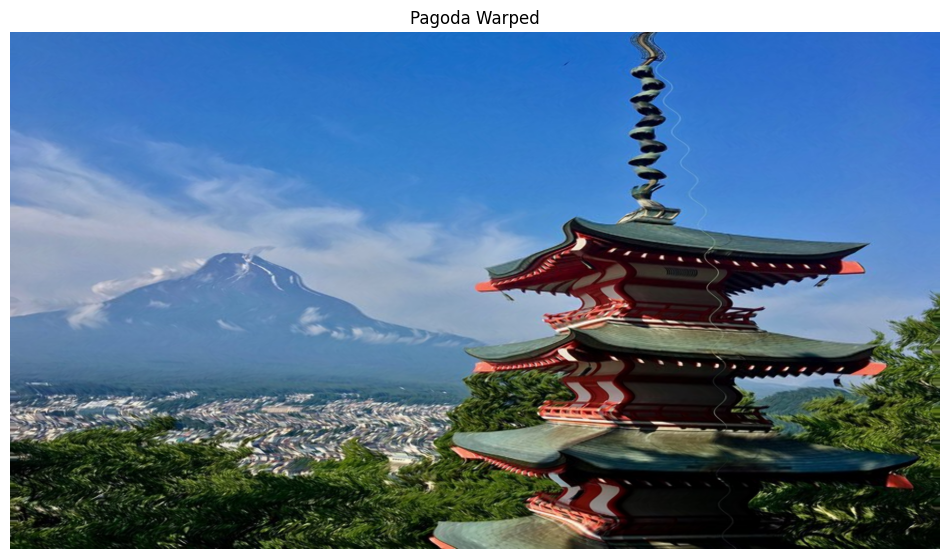

In [4]:
'''
Bài 4: 
Chọn ngôi chùa bất kì.
Phóng to ngôi chùa lên 5 lần.
Áp dụng một biến đổi hình học tùy chỉnh (geometric transform) để tạo hiệu ứng "uốn cong" (warping) ngôi chùa.
Lưu ảnh kết quả vào pagoda_warped.jpg.
'''

import matplotlib.pyplot as plt
import cv2
import numpy as np
import os


pagoda_path = "./img/pagoda.jpg"

# Kiểm tra tồn tại file
if not os.path.exists(pagoda_path):
    print(f"❌ Không tìm thấy ảnh ngôi chùa tại: {pagoda_path}")
    raise FileNotFoundError(f"Không tìm thấy ảnh ngôi chùa tại: {pagoda_path}")

# Đọc ảnh
img = cv2.imread(pagoda_path)

# Phóng to ảnh lên 5 lần
h, w = img.shape[:2]
img_resized = cv2.resize(img, (w * 5, h * 5), interpolation=cv2.INTER_LINEAR)

# Hàm warp_wave vector hóa, tránh vòng lặp chậm
def warp_wave(img, amplitude=30, wavelength=150):
    h, w = img.shape[:2]
    x, y = np.meshgrid(np.arange(w), np.arange(h))
    map_x = (x + amplitude * np.sin(2 * np.pi * y / wavelength)).astype(np.float32)
    map_y = y.astype(np.float32)
    warped = cv2.remap(img, map_x, map_y, interpolation=cv2.INTER_LINEAR, borderMode=cv2.BORDER_REPLICATE)
    return warped

# Áp dụng hiệu ứng uốn cong
img_warped = warp_wave(img_resized, amplitude=30, wavelength=150)

# Tạo thư mục lưu nếu chưa có
output_dir = "output"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Lưu ảnh kết quả
save_path = os.path.join(output_dir, "pagoda_warped.jpg")
cv2.imwrite(save_path, img_warped)
print(f"✅ Đã lưu ảnh tại: {save_path}")

# Hiển thị ảnh trong Jupyter Notebook với màu đúng
plt.figure(figsize=(12, 8))
plt.imshow(cv2.cvtColor(img_warped, cv2.COLOR_BGR2RGB))
plt.title("Pagoda Warped")
plt.axis('off')
plt.show()


In [5]:
'''
Bài 5:
Tạo một chương trình menu tương tác cho phép người dùng chọn các phép biến đổi sau:
Tịnh tiến (hỏi số pixel di chuyển theo x và y).
Xoay (hỏi góc xoay và chọn reshape=True/False).
Phóng to/thu nhỏ (hỏi hệ số zoom).
Làm mờ Gaussian (hỏi giá trị sigma).
Biến đổi sóng (hỏi biên độ sóng).
Người dùng chọn ảnh từ 3 ảnh bất kì
'''

import cv2
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output


image_paths = {
    "Kiwi": "./img/kiwi.png",
    "Pagoda": "./img/pagoda.jpg",
    "Mountain": "./img/mountain.jpg"
}

# Đọc ảnh từ đường dẫn, trả về ảnh BGR
def load_image(name):
    path = image_paths[name]
    img = cv2.imread(path)
    if img is None:
        raise FileNotFoundError(f"Không tìm thấy ảnh: {path}")
    return img

# Các hàm biến đổi ảnh

def translate(img, tx, ty):
    rows, cols = img.shape[:2]
    M = np.float32([[1, 0, tx], [0, 1, ty]])
    return cv2.warpAffine(img, M, (cols, rows))

def rotate(img, angle, reshape):
    (h, w) = img.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    if reshape:
        # Tính bounding box mới
        cos = np.abs(M[0, 0])
        sin = np.abs(M[0, 1])
        new_w = int((h * sin) + (w * cos))
        new_h = int((h * cos) + (w * sin))
        M[0, 2] += (new_w / 2) - center[0]
        M[1, 2] += (new_h / 2) - center[1]
        rotated = cv2.warpAffine(img, M, (new_w, new_h))
    else:
        rotated = cv2.warpAffine(img, M, (w, h))
    return rotated

def zoom(img, scale):
    h, w = img.shape[:2]
    new_w, new_h = int(w * scale), int(h * scale)
    return cv2.resize(img, (new_w, new_h), interpolation=cv2.INTER_LINEAR)

def gaussian_blur(img, sigma):
    ksize = int(6 * sigma + 1)
    if ksize % 2 == 0:
        ksize += 1
    return cv2.GaussianBlur(img, (ksize, ksize), sigmaX=sigma)

def wave_transform(img, amplitude):
    h, w = img.shape[:2]
    x, y = np.meshgrid(np.arange(w), np.arange(h))
    map_x = (x + amplitude * np.sin(2 * np.pi * y / 150)).astype(np.float32)
    map_y = y.astype(np.float32)
    warped = cv2.remap(img, map_x, map_y, interpolation=cv2.INTER_LINEAR, borderMode=cv2.BORDER_REPLICATE)
    return warped

# Widget chọn ảnh
image_selector = widgets.Dropdown(options=list(image_paths.keys()), description='Chọn ảnh:')

# Widget chọn phép biến đổi
transform_selector = widgets.Dropdown(
    options=['Tịnh tiến', 'Xoay', 'Phóng to/thu nhỏ', 'Làm mờ Gaussian', 'Biến đổi sóng'],
    description='Biến đổi:'
)

# Các widget tham số biến đổi (ẩn/hiện tùy biến đổi)
tx_widget = widgets.IntSlider(value=0, min=-200, max=200, description='Dịch X:')
ty_widget = widgets.IntSlider(value=0, min=-200, max=200, description='Dịch Y:')

angle_widget = widgets.IntSlider(value=0, min=-180, max=180, description='Góc xoay:')
reshape_widget = widgets.Checkbox(value=False, description='reshape=True')

scale_widget = widgets.FloatSlider(value=1.0, min=0.1, max=5.0, step=0.1, description='Hệ số zoom:')

sigma_widget = widgets.FloatSlider(value=1.0, min=0.1, max=10.0, step=0.1, description='Sigma Gaussian:')

amplitude_widget = widgets.IntSlider(value=0, min=0, max=100, description='Biên độ sóng:')

# Nút thực thi
button = widgets.Button(description="Áp dụng biến đổi")

output = widgets.Output()

# Hàm cập nhật tham số hiển thị theo biến đổi chọn
def update_params(*args):
    tx_widget.layout.display = 'none'
    ty_widget.layout.display = 'none'
    angle_widget.layout.display = 'none'
    reshape_widget.layout.display = 'none'
    scale_widget.layout.display = 'none'
    sigma_widget.layout.display = 'none'
    amplitude_widget.layout.display = 'none'
    
    t = transform_selector.value
    if t == 'Tịnh tiến':
        tx_widget.layout.display = ''
        ty_widget.layout.display = ''
    elif t == 'Xoay':
        angle_widget.layout.display = ''
        reshape_widget.layout.display = ''
    elif t == 'Phóng to/thu nhỏ':
        scale_widget.layout.display = ''
    elif t == 'Làm mờ Gaussian':
        sigma_widget.layout.display = ''
    elif t == 'Biến đổi sóng':
        amplitude_widget.layout.display = ''

transform_selector.observe(update_params, names='value')
update_params()

# Hàm xử lý khi nhấn nút
def on_button_clicked(b):
    with output:
        clear_output()
        img = load_image(image_selector.value)
        
        t = transform_selector.value
        if t == 'Tịnh tiến':
            tx = tx_widget.value
            ty = ty_widget.value
            img_out = translate(img, tx, ty)
        elif t == 'Xoay':
            angle = angle_widget.value
            reshape = reshape_widget.value
            img_out = rotate(img, angle, reshape)
        elif t == 'Phóng to/thu nhỏ':
            scale = scale_widget.value
            img_out = zoom(img, scale)
        elif t == 'Làm mờ Gaussian':
            sigma = sigma_widget.value
            img_out = gaussian_blur(img, sigma)
        elif t == 'Biến đổi sóng':
            amplitude = amplitude_widget.value
            img_out = wave_transform(img, amplitude)
        else:
            img_out = img
        
        # Hiển thị ảnh kết quả
        plt.figure(figsize=(8, 6))
        plt.imshow(cv2.cvtColor(img_out, cv2.COLOR_BGR2RGB))
        plt.title(f"{t} trên ảnh {image_selector.value}")
        plt.axis('off')
        plt.show()

button.on_click(on_button_clicked)

# Hiển thị widget
display(widgets.VBox([
    image_selector,
    transform_selector,
    tx_widget,
    ty_widget,
    angle_widget,
    reshape_widget,
    scale_widget,
    sigma_widget,
    amplitude_widget,
    button,
    output
]))
